In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

def extract_strains(start_time, end_time, loop, pos, col):

    main_path = 'GÄB'

    # List all subfolders in the main folder
    subfolders = [
        name for name in os.listdir(main_path)
        if os.path.isdir(os.path.join(main_path, name)) and name.isdigit()  # Check if folder name is a number
    ]

    # Find the indexes of the start and end subfolders
    try:
        start_index = subfolders.index(start_time)
        end_index = subfolders.index(end_time)

        # Extract subfolders between the start and end subfolder (exclusive)
        subfolders_between = subfolders[start_index:end_index + 1]
        
        # Generate relative paths from the main folder
        subfolder_relative_paths = [os.path.relpath(os.path.join(main_path, folder), main_path) for folder in subfolders_between]

        print(len(subfolder_relative_paths), "subfolders found for the specified start and end times.")

    except ValueError:
        print("One or both of the specified subfolders were not found.")


    columns = ['Time_index', 'Time', 'Strain']
    df_strains = pd.DataFrame(columns=columns)

    for subfolder in subfolder_relative_paths:
        path = os.path.join(main_path, subfolder, loop)
        try:
            df = pd.read_csv(path, delimiter='\t', header=None) 

            # Ensure that column_number is within the valid range
            if col < len(df.columns):
                # Find the row based on a matching condition (adjust as necessary)
                matching_row = df[df[0] == pos]  # Assuming row_name is in column 0, adjust if needed

                # Check if the row exists
                if not matching_row.empty:
                    strain = matching_row.iloc[0, col]
                else:
                    print(f"No matching row found in {subfolder}.")
                    strain = np.nan
            else:
                print(f"Invalid column number in {subfolder}.")
                strain = np.nan
        except FileNotFoundError:
            print(f"File not found: {path}")
            strain = np.nan

        time = pd.to_datetime(str(subfolder), format="%Y%m%d%H%M%S") #convert the subfolder name to a datetime object
        row = pd.DataFrame([[subfolder, time, strain]], columns=columns) #create a new row with the data
        df_strains = pd.concat([df_strains, row], ignore_index=True) #add the new row to the dataframe

    # Define the relative path for saving the CSV file
    output_folder = "strain_csv"
    os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
    output_csv = os.path.join(output_folder, f"{loop}_{pos}_{start_time}-{end_time}.csv")

    # Save the DataFrame to a CSV file
    df_strains.to_csv(output_csv, index=False)

    return df_strains

start_time = '20090605000000' #First timestamp
end_time = '20130410160000' #Last timestamp
loop ='EI_N-B_Far_Comp.txt' #Name the file containing the data
pos = 'N13, B, 12.64' #Position of interest along the beam
col = 4  # Column number containing the strain data

extract_strains(start_time, end_time, loop, pos, col)

KeyboardInterrupt: 

In [ ]:
from collections import Counter

def count_files_in_subfolders(main_folder):
    # Initialize a Counter to store file names and their occurrences
    file_counter = Counter()

    # List all subfolders in the main folder
    subfolders = [
        name for name in os.listdir(main_folder)
        if os.path.isdir(os.path.join(main_folder, name))  # Check if folder
    ]

    # Iterate through each subfolder
    for subfolder in subfolders:
        subfolder_path = os.path.join(main_folder, subfolder)
        print(f"Processing subfolder: {subfolder_path}")

        # List all files in the subfolder
        files_in_subfolder = [
            name for name in os.listdir(subfolder_path)
            if os.path.isfile(os.path.join(subfolder_path, name))  # Check if file
        ]

        # Update the counter with the files from the current subfolder
        file_counter.update(files_in_subfolder)

    # Return the counter with file counts
    return file_counter

# Example usage:
main_folder = 'GÄB'
file_counts = count_files_in_subfolders(main_folder)

# Print the results
print(file_counts)


Processing subfolder: GÄB\20070812140000
Processing subfolder: GÄB\20070812160000
Processing subfolder: GÄB\20070812180000
Processing subfolder: GÄB\20070812200000
Processing subfolder: GÄB\20070812220000
Processing subfolder: GÄB\20070813000000
Processing subfolder: GÄB\20070813020000
Processing subfolder: GÄB\20070813040000
Processing subfolder: GÄB\20070813060000
Processing subfolder: GÄB\20070813080000
Processing subfolder: GÄB\20070813100000
Processing subfolder: GÄB\20070813120000
Processing subfolder: GÄB\20070813140000
Processing subfolder: GÄB\20070813160000
Processing subfolder: GÄB\20070813180000
Processing subfolder: GÄB\20070813200000
Processing subfolder: GÄB\20070813220000
Processing subfolder: GÄB\20070814000000
Processing subfolder: GÄB\20070814020000
Processing subfolder: GÄB\20070814040000
Processing subfolder: GÄB\20070814060000
Processing subfolder: GÄB\20070814080000
Processing subfolder: GÄB\20070814100000
Processing subfolder: GÄB\20070814120000
Processing subfo

KeyboardInterrupt: 

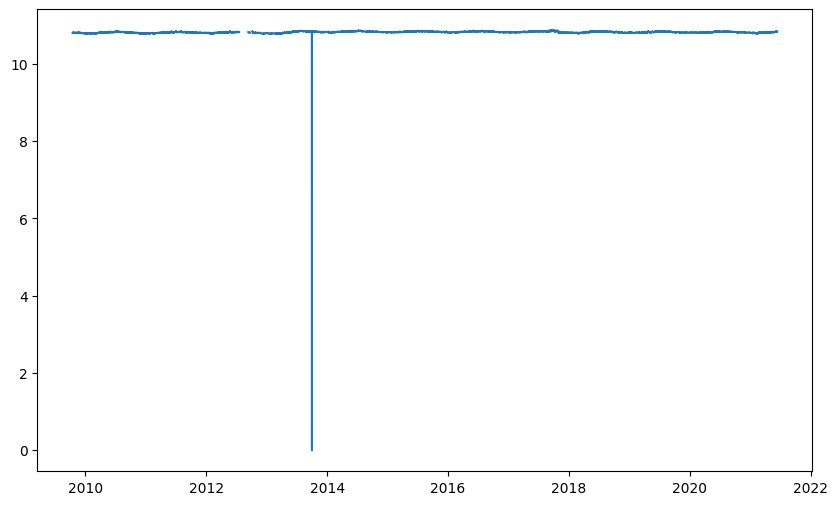

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_strains['Time'], df_strains['Strain'], linestyle='-')

In [ ]:
df_zero = df_strains[df_strains["Strain"] == 0]
print(df_zero)

          Time_index                Time  Strain
8579  20131001080000 2013-10-01 08:00:00     0.0
8580  20131001120000 2013-10-01 12:00:00     0.0


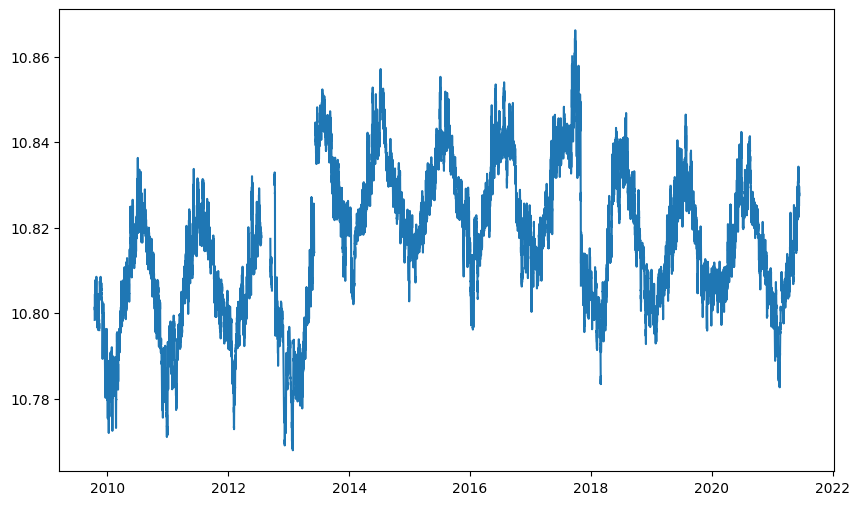

In [ ]:
indices_to_remove = df_zero.index
df_cleaned = df_strains.drop(index=indices_to_remove)
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Time'], df_cleaned['Strain'], linestyle='-')

In [ ]:
df_loops = pd.read_csv('file_counts.txt', delimiter='\t', header=None)

# Filter the rows where column 0 starts with 'EI'
df_filtered = df_loops[df_loops[0].str.startswith('EI')]

# Show the filtered dataframe
print(df_filtered)

loops = df_filtered[0].tolist()

                           0      1
97     EI_N-B-Close_Comp.txt  24690
98     EI_N-B-Mid-I_Comp.txt    234
99      EI_N-BD-Far_Comp.txt    234
100  EI_N-C-Close-I_Comp.txt    234
101      EI_N-C-Mid_Comp.txt    235
..                       ...    ...
257     EI_N-D_Mid2_Comp.txt    297
264   EI_N-D_Mid1_Comp_r.txt     33
265   EI_N-D_Mid2_Comp_r.txt     32
268   EI_N-D_Mid1_r_Comp.txt  19185
269   EI_N-D_Mid2_r_Comp.txt  19624

[80 rows x 2 columns]


['EI_N-B-Close_Comp.txt',
 'EI_N-B-Mid-I_Comp.txt',
 'EI_N-BD-Far_Comp.txt',
 'EI_N-C-Close-I_Comp.txt',
 'EI_N-C-Mid_Comp.txt',
 'EI_N-D-Close_Comp.txt',
 'EI_N-D-Mid_Comp.txt',
 'EI_N-E-Close-C-Close-II_Comp.txt',
 'EI_N-E-Mid_Comp.txt',
 'EI_N-EC-Far_Comp.txt',
 'EI_N-F-Close-B-Mid-II_Comp.txt',
 'EI_N-F-Far_Comp.txt',
 'EI_N-Klaff_Comp.txt',
 'EI_S-ABDE-Far_Comp.txt',
 'EI_S-B-Close_Comp.txt',
 'EI_S-B-Mid_Comp.txt',
 'EI_S-B-Tunnel_Comp.txt',
 'EI_S-BC-Parking_Comp.txt',
 'EI_S-C-Close_Comp.txt',
 'EI_S-C-Mid_Comp.txt',
 'EI_S-C-Tunnel_Comp.txt',
 'EI_S-D-Close_Comp.txt',
 'EI_S-D-Mid-C-Far_Comp.txt',
 'EI_S-D-Tunnel-E-Parking_Comp.txt',
 'EI_S-E-Close_Comp.txt',
 'EI_S-E-Mid_Comp.txt',
 'EI_S-E-Tunnel_Comp.txt',
 'EI_S-F-Close_Comp.txt',
 'EI_S-F-Mid_Comp.txt',
 'EI_S-F-Tunnel_Comp.txt',
 'EI_S-FD-Parking_Comp.txt',
 'EI_S-GFEDC-arm_Comp.txt',
 'EI_N-B_Far_Comp.txt',
 'EI_N-B_Mid2_Comp.txt',
 'EI_N-C_Close2_Comp.txt',
 'EI_N-C_Far_Comp.txt',
 'EI_N-D_Close_Comp.txt',
 'EI_N-D_Far

In [ ]:
import pandas as pd
import numpy as np
import os

main_path = 'GÄB'
loop ='EI_N-B-Close_Comp.txt' #Name the file containing the data
time = '20090605000000' #First timestamp
col = 4  # Column number containing the strain data

path = os.path.join(main_path, time, loop)

df = pd.read_csv(path, delimiter='\t', header=None)
df = df.iloc[:, [0, col]]  # Select only the first and fourth columns

df.iloc[:,0] = df.iloc[:,0].str.split(',').str[0]

# Count the occurrences of each entry in the first column
counts = df.iloc[:, 0].value_counts()

# Create a DataFrame to store the counts
counts_df = pd.DataFrame(counts).reset_index()
counts_df.columns = ['Entry', 'Count']  # Rename the columns for clarity

# Display the counts DataFrame
print(counts_df)

medians = []
# positions = []
for i in range(len(counts_df)):
    entry = counts_df.iloc[i, 0]
    count = counts_df.iloc[i, 1]
    median = np.ceil(count/2) #find median to get strain in mid span
    medians.append(int(median))

counts_df['Median'] = medians
counts_df


  Entry  Count
0   VII    414
1    VI    400
2  VIII    385
3    IX    340


,Entry,Count,Median
0,VII,414,207
1,VI,400,200
2,VIII,385,193
3,IX,340,170


In [ ]:
np.ceil(414/2)
np.ceil(5/2)

np.float64(3.0)

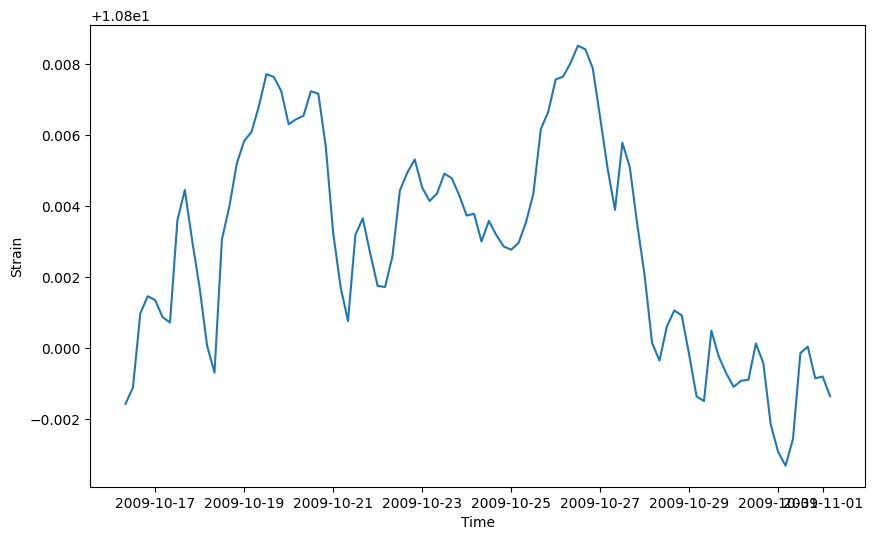

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv('strain_csv/EI_N-B_Mid2_Comp.txt_N10, B, 0.62_20090605000000-20210611160000.csv', parse_dates=['Time'])
df = pd.read_csv('strain_csv/EI_N-B_Far_Comp.txt_N13, B, 12.64_20090605000000-20091101040000.csv', parse_dates=['Time'])

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
# plt.plot(df['Time'].iloc[:100], df['Strain'].iloc[:100], linestyle='-')

# Labels and title
plt.xlabel('Time')
plt.ylabel('Strain')

# Show the plot
plt.show()

In [ ]:
df_zero = df[df["Strain"] == 0]
print(df_zero)

          Time_index                Time  Strain
8579  20131001080000 2013-10-01 08:00:00     0.0


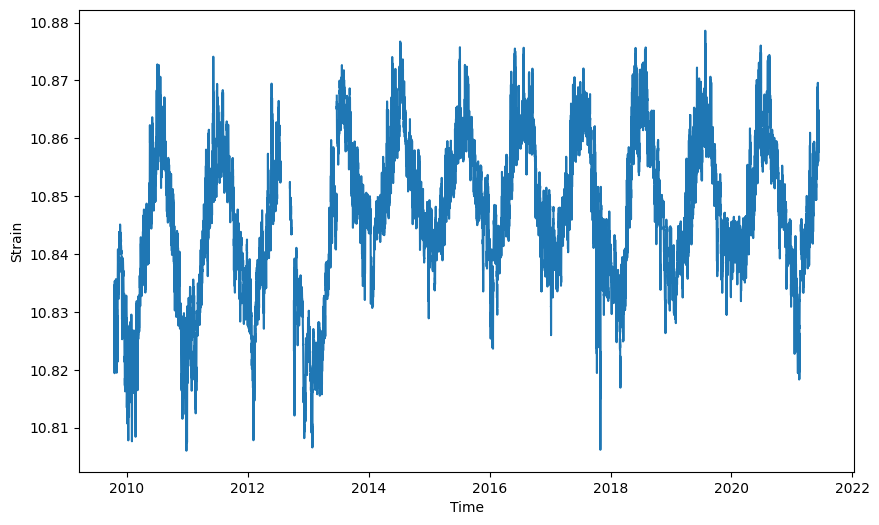

In [ ]:
indices_to_remove = df_zero.index
df_cleaned = df.drop(index=indices_to_remove)
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Time'], df_cleaned['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.show()

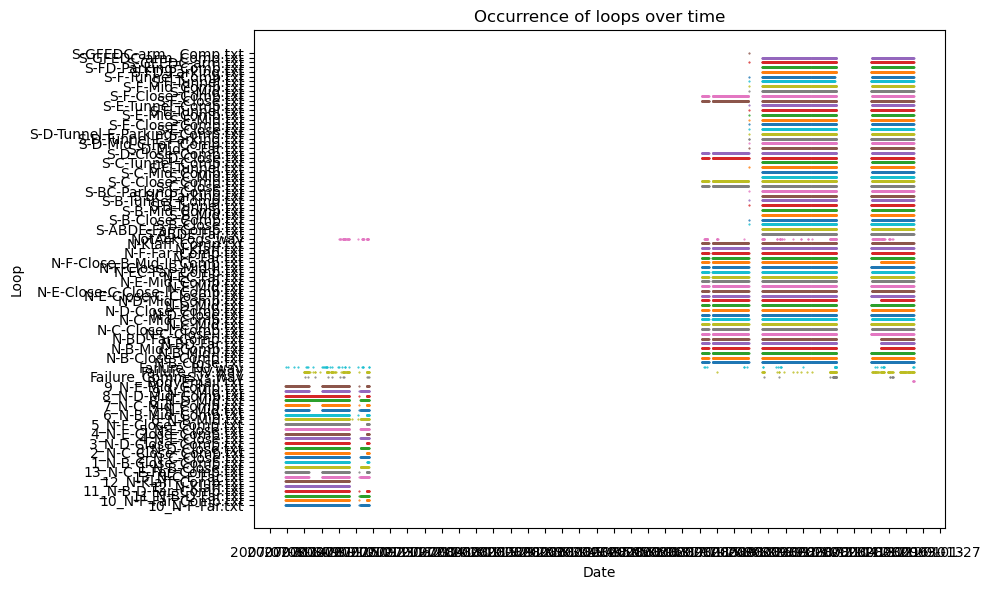

In [20]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('GÄB/filelist.txt', delimiter=',', header=None)
df.rename(columns={df.columns[0]: 'Date_path'}, inplace=True)
df['Datetime'] = pd.to_datetime(df['Date_path'], format='%Y%m%d%H%M%S')
df.rename(columns={df.columns[1]: 'Loop'}, inplace=True)
df = df[['Date_path', 'Datetime', 'Loop']]
df = df.head(100000)

groups = df.groupby('Loop')
indices_dict = groups.indices

plt.figure(figsize=(10, 6))
for key, indices in indices_dict.items():
    scatter_data = df.loc[indices, ['Datetime', 'Loop']]
    plt.scatter(scatter_data['Datetime'], scatter_data['Loop'], label=key, marker='.', s=1)

plt.yticks(range(len(indices_dict)))

# Set the x-axis to display fewer ticks and format the date labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Adjust interval as needed
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust layout to ensure all labels fit without rotation
plt.gca().tick_params(axis='x', which='major', pad=10)

plt.xlabel('Date')
plt.ylabel('Loop')
plt.title('Occurrence of loops over time')

# Ensure labels fit well
plt.tight_layout()

# Display the plot
plt.show()


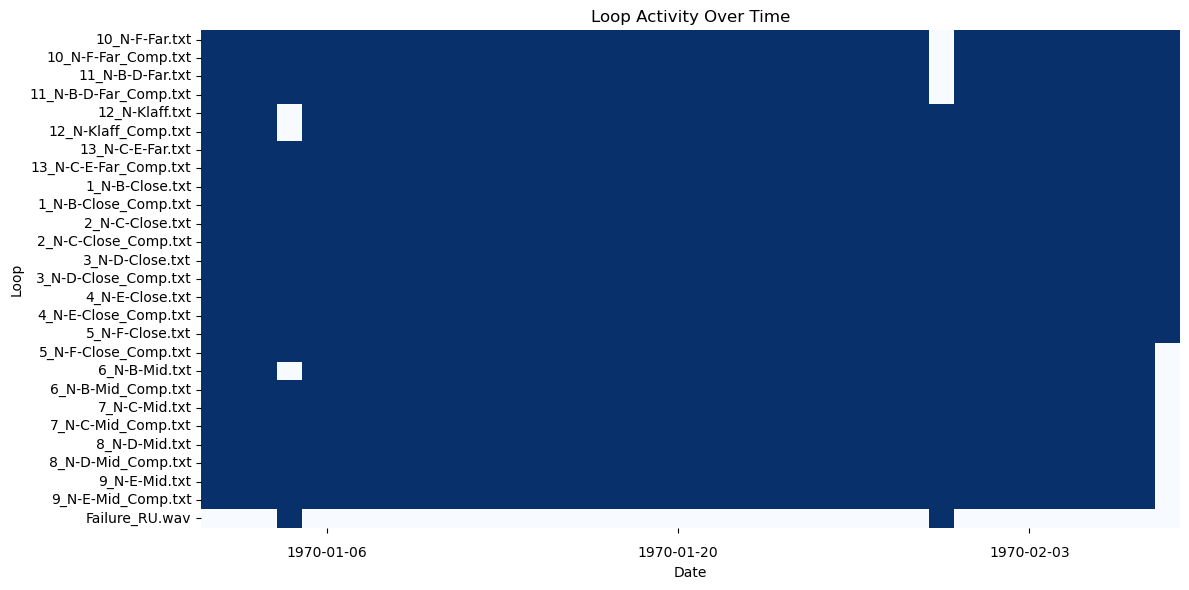

In [22]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

# Read and preprocess the data
df = pd.read_csv('GÄB/filelist.txt', delimiter=',', header=None)
df.rename(columns={df.columns[0]: 'Date_path'}, inplace=True)
df['Datetime'] = pd.to_datetime(df['Date_path'], format='%Y%m%d%H%M%S')
df.rename(columns={df.columns[1]: 'Loop'}, inplace=True)
df = df[['Date_path', 'Datetime', 'Loop']]
df = df.head(1000)

# Create a time index for the heatmap (choose a suitable frequency for your time data)
df['Date'] = df['Datetime'].dt.date  # Use just the date part
df['Hour'] = df['Datetime'].dt.hour  # You could use minutes or hours depending on your data's granularity

# Create a matrix with loops as rows and time as columns
pivot_table = df.pivot_table(index='Loop', columns='Datetime', aggfunc='size', fill_value=0)

# Generate the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='Blues', cbar=False, xticklabels=10, yticklabels=True)

# Format the x-axis ticks to show dates (adjust this part based on your data's time range)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Adjust interval as needed
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Additional formatting
plt.gca().tick_params(axis='x', which='major', pad=10)
plt.xlabel('Date')
plt.ylabel('Loop')
plt.title('Loop Activity Over Time')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


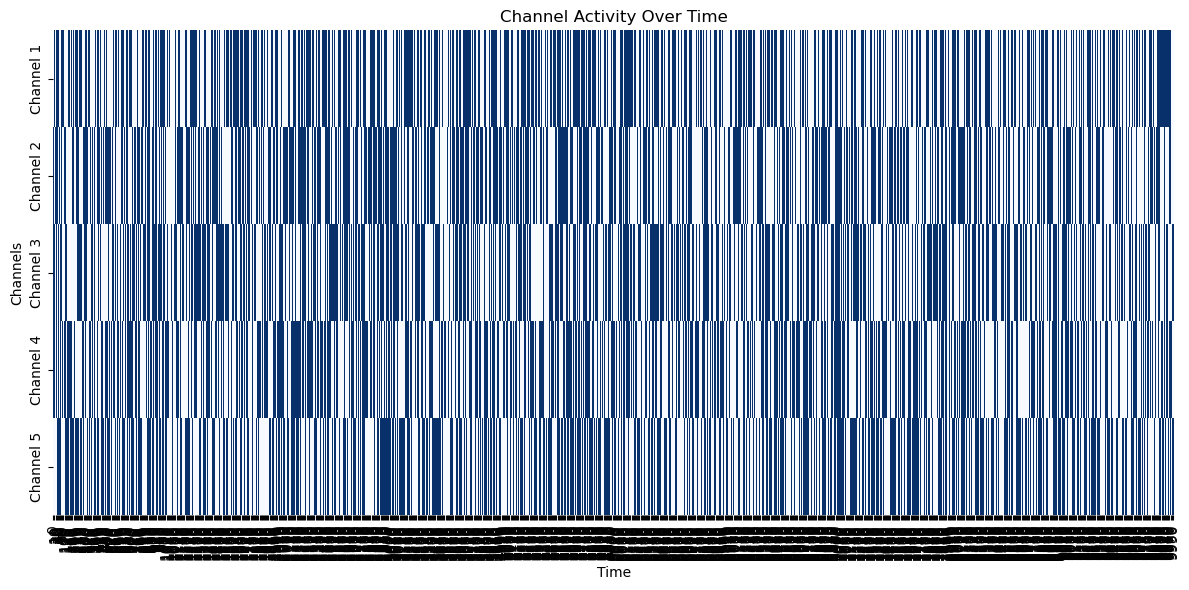

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data: Each channel's activity over time (1 = active, 0 = inactive)
# Suppose we have 5 channels and 100 time points
channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5']
time_points = 10000

# Generate random activity data (for demonstration purposes)
activity_data = np.random.randint(0, 2, size=(len(channels), time_points))

# Create the heatmap with horizontal lines between channels
plt.figure(figsize=(12, 6))
sns.heatmap(activity_data, cmap='Blues', cbar=False, xticklabels=10, yticklabels=channels)

plt.xlabel('Time')
plt.ylabel('Channels')
plt.title('Channel Activity Over Time')

# Display the plot
plt.tight_layout()
plt.show()


In [45]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

df = pd.read_csv('GÄB/filelist.txt', delimiter=',', header=None)
df.rename(columns={df.columns[0]: 'Date_path'}, inplace=True)
df['Datetime'] = pd.to_datetime(df['Date_path'], format='%Y%m%d%H%M%S')
df.rename(columns={df.columns[1]: 'Loop'}, inplace=True)
df = df[['Date_path', 'Datetime', 'Loop']]
df = df.head(1000)

loops = df['Loop'].unique()

indices_dict = {}  # Dictionary to store indices

for loop in loops: 
    indices_dict[loop] = df[df['Loop'] == loop].index.tolist()

# Print the indices for a specific loop value
print(indices_dict)


{'10_N-F-Far.txt': [0, 26, 52, 78, 102, 128, 154, 180, 206, 232, 258, 284, 310, 336, 362, 388, 414, 440, 466, 492, 518, 544, 570, 596, 622, 648, 674, 700, 726, 775, 801, 827, 853, 879, 905, 931, 957, 983], '10_N-F-Far_Comp.txt': [1, 27, 53, 79, 103, 129, 155, 181, 207, 233, 259, 285, 311, 337, 363, 389, 415, 441, 467, 493, 519, 545, 571, 597, 623, 649, 675, 701, 727, 776, 802, 828, 854, 880, 906, 932, 958, 984], '11_N-B-D-Far.txt': [2, 28, 54, 80, 104, 130, 156, 182, 208, 234, 260, 286, 312, 338, 364, 390, 416, 442, 468, 494, 520, 546, 572, 598, 624, 650, 676, 702, 728, 777, 803, 829, 855, 881, 907, 933, 959, 985], '11_N-B-D-Far_Comp.txt': [3, 29, 55, 81, 105, 131, 157, 183, 209, 235, 261, 287, 313, 339, 365, 391, 417, 443, 469, 495, 521, 547, 573, 599, 625, 651, 677, 703, 729, 778, 804, 830, 856, 882, 908, 934, 960, 986], '12_N-Klaff.txt': [4, 30, 56, 106, 132, 158, 184, 210, 236, 262, 288, 314, 340, 366, 392, 418, 444, 470, 496, 522, 548, 574, 600, 626, 652, 678, 704, 730, 752, 779, 

Number of channels: 279


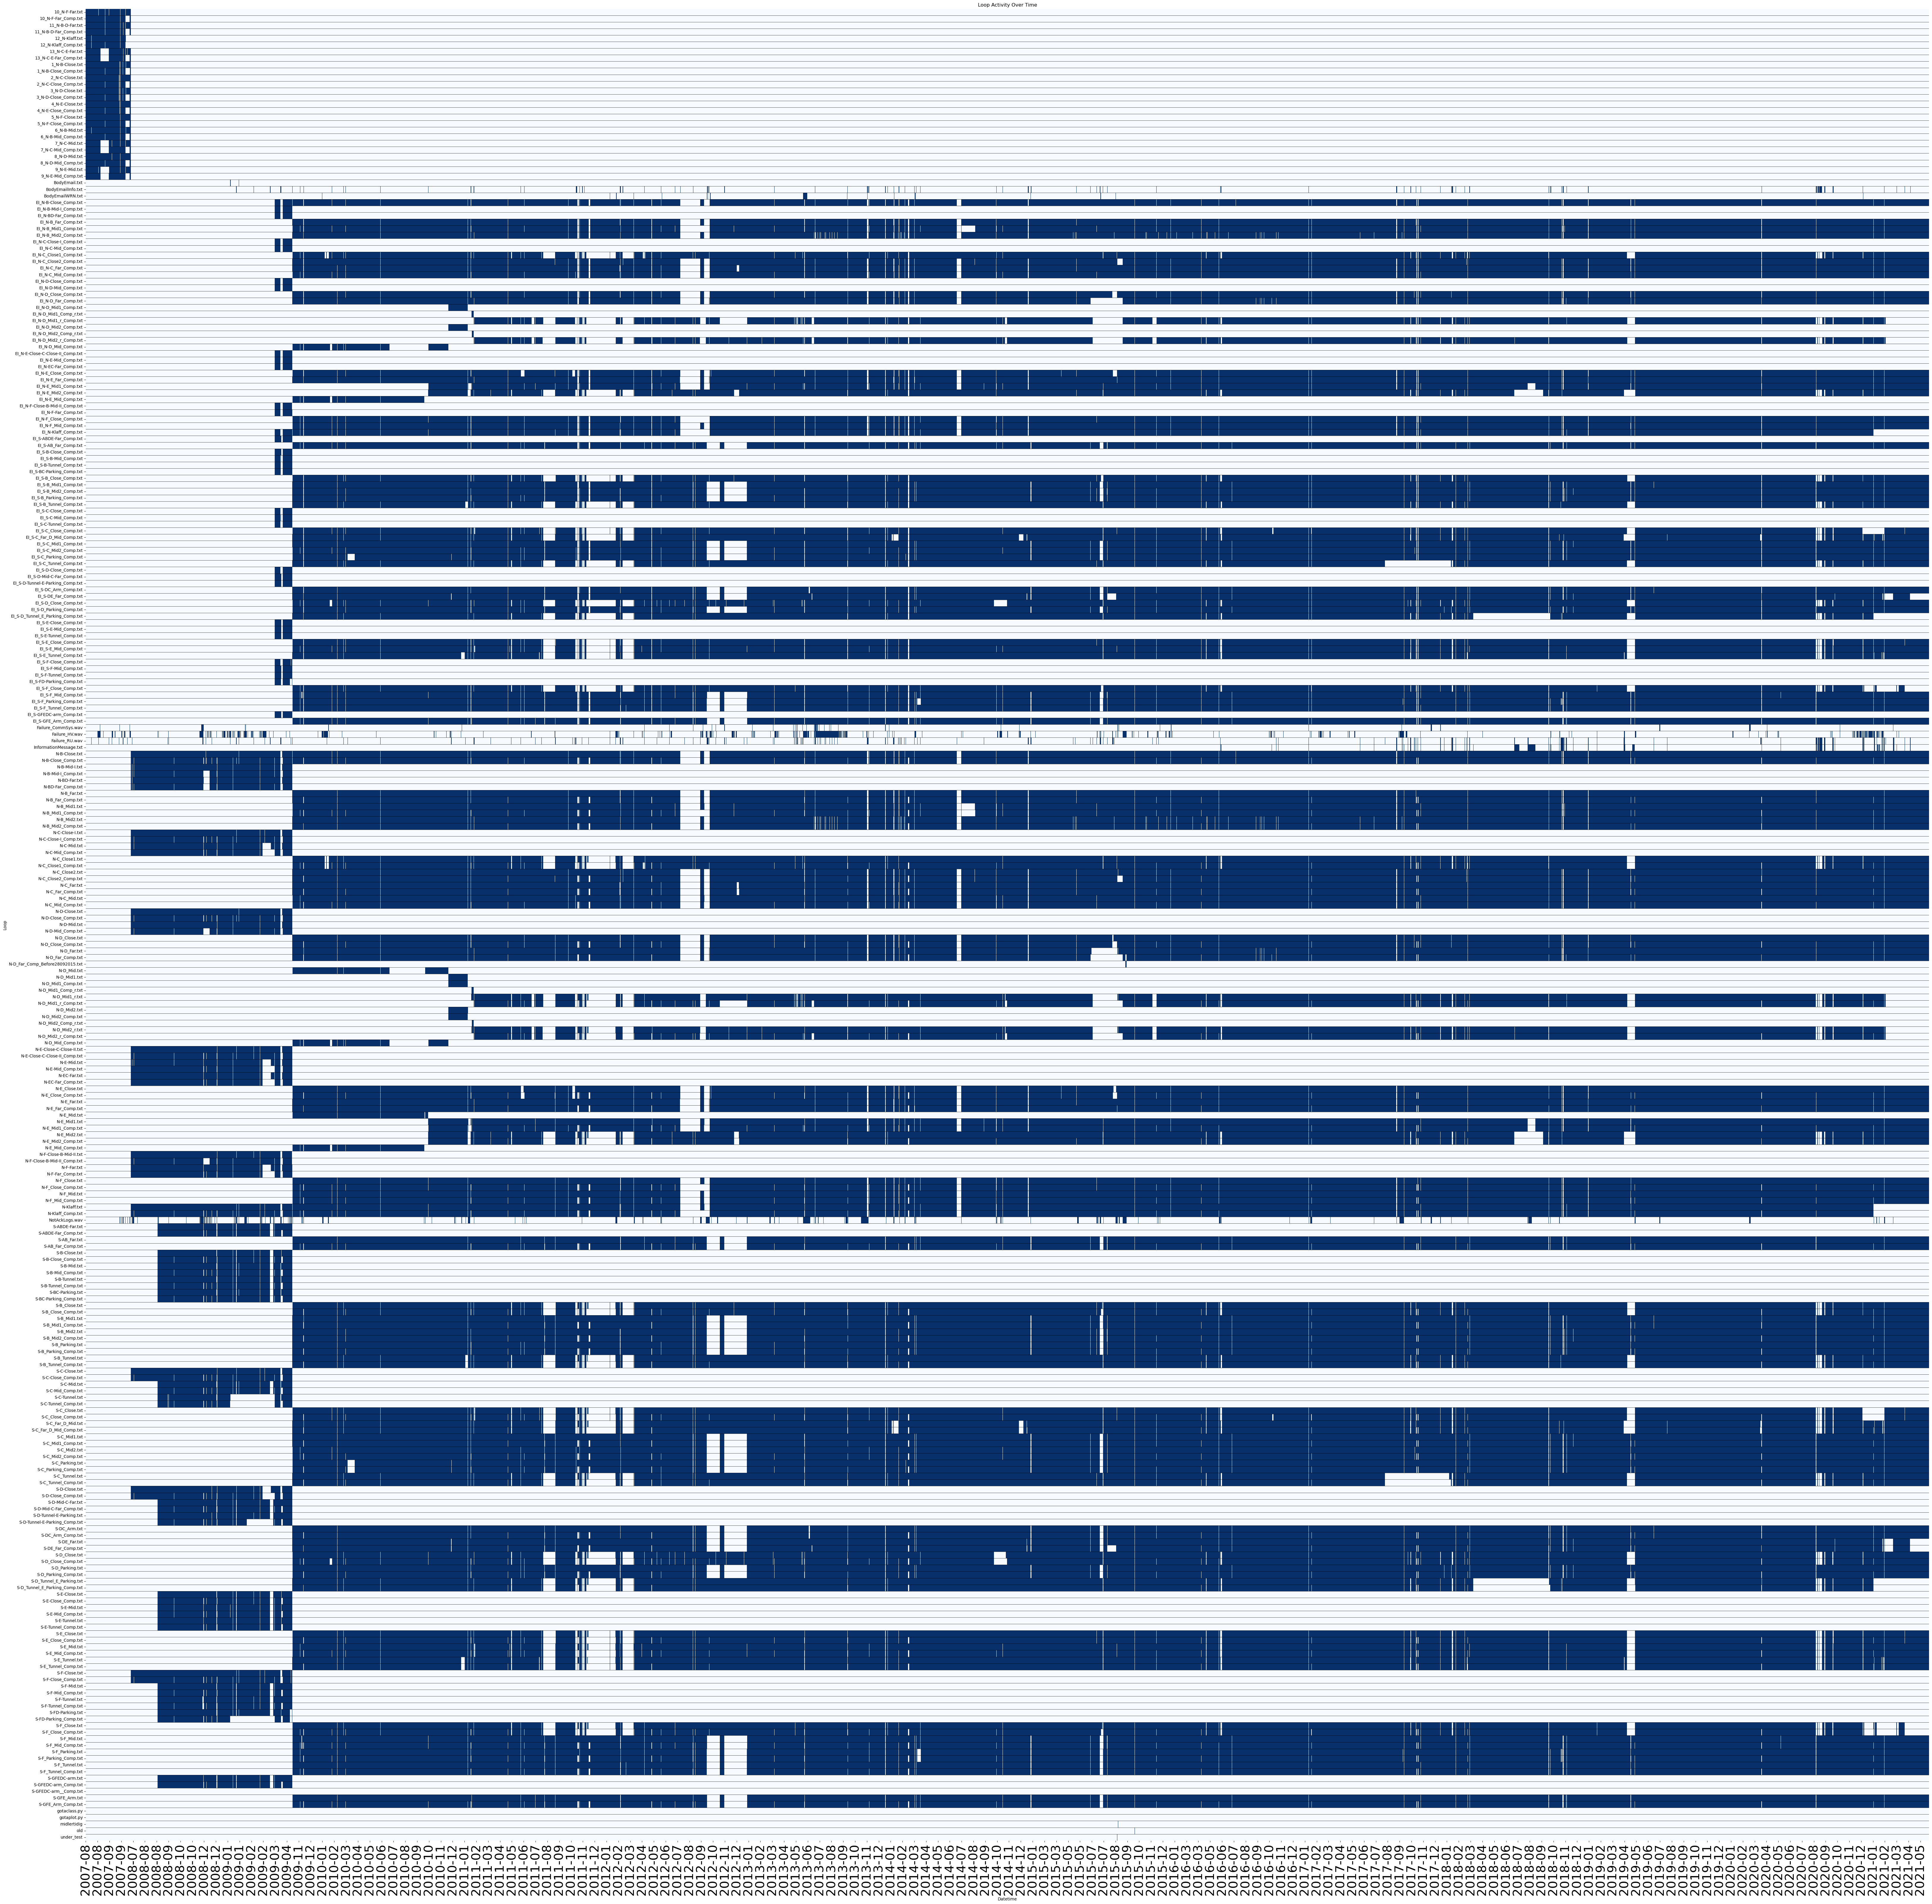

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Read and process data
df = pd.read_csv('GÄB/filelist.txt', delimiter=',', header=None)
df.rename(columns={df.columns[0]: 'Date_path'}, inplace=True)
df['Datetime'] = pd.to_datetime(df['Date_path'], format='%Y%m%d%H%M%S')
df.rename(columns={df.columns[1]: 'Loop'}, inplace=True)
dates = df['Datetime'].unique()

loop_counts = df['Loop'].value_counts()
print(f'Number of channels: {len(loop_counts)}')

# Create a boolean matrix using pivot_table()
boolean_matrix = df.pivot_table(index='Loop', columns='Datetime', aggfunc=lambda x: 1, fill_value=0)

# Plot heatmap with horizontal lines only
plt.figure(figsize=(80, 80))
ax = sns.heatmap(boolean_matrix, cmap="Blues", cbar=False)

plt.title("Loop Activity Over Time")

# Ensure labels are not rotated
step = int(max(1, len(dates) / (len(dates)/30.5/6)))
ax.set_xticks(range(0, len(dates), step))  # Set ticks at intervals
ax.set_xticklabels([dates[i].strftime('%Y-%m') for i in range(0, len(dates), step)], rotation=90, fontsize=30)

ax.hlines(y=[i + 1 for i in range(len(boolean_matrix))], xmin=0, xmax=len(boolean_matrix.columns), color='black', linewidth=0.5)

ax.set_yticklabels(boolean_matrix.index, rotation=0)

# Show plot
plt.show()
